<a href="https://colab.research.google.com/github/Hamzahamada98/codex/blob/main/Learn_ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Les Données (Training Set)
# Scikit-Learn veut que les caractéristiques (X) soient dans un tableau 2D (une liste de listes).
# C'est comme une feuille Excel : chaque ligne est une maison, chaque colonne une caractéristique.
X = np.array([[50], [80], [120]])

# Les étiquettes (y) peuvent être une simple liste (vecteur).
y = np.array([150, 240, 350])

print("Environnement prêt et données chargées !")

Environnement prêt et données chargées !


In [3]:
from sklearn.linear_model import LinearRegression

# 1. On crée le modèle
model = LinearRegression()

# 2. L'entraînement (Le moment où il apprend)
# Il applique la Descente de Gradient (ou équivalent) pour trouver la meilleure droite
model.fit(X, y)

# 3. La Prédiction
# On lui demande : "Combien pour 100 m² ?"
surface_a_predire = [[100]]
prix_estime = model.predict(surface_a_predire)

print(f"Le modèle a appris ! ✅")
print(f"Prix estimé pour une maison de 100 m² : {prix_estime[0]:.2f} k€")

Le modèle a appris ! ✅
Prix estimé pour une maison de 100 m² : 294.19 k€


In [4]:
# On récupère les paramètres appris par le modèle
a = model.coef_[0]  # La pente
b = model.intercept_  # L'ordonnée à l'origine

print(f"a (pente) = {a:.2f}")
print(f"b (point de départ) = {b:.2f}")

a (pente) = 2.85
b (point de départ) = 9.05


In [5]:
from sklearn.metrics import mean_squared_error

# 1. On demande au modèle de prédire les prix pour nos 3 maisons d'entraînement
predictions = model.predict(X)

# 2. On compare ces prédictions avec les vrais prix (y)
lin_mse = mean_squared_error(y, predictions)
lin_rmse = np.sqrt(lin_mse) # On prend la racine carrée pour revenir en k€

print(f"Erreur moyenne (RMSE) : {lin_rmse:.2f} k€")

Erreur moyenne (RMSE) : 2.01 k€


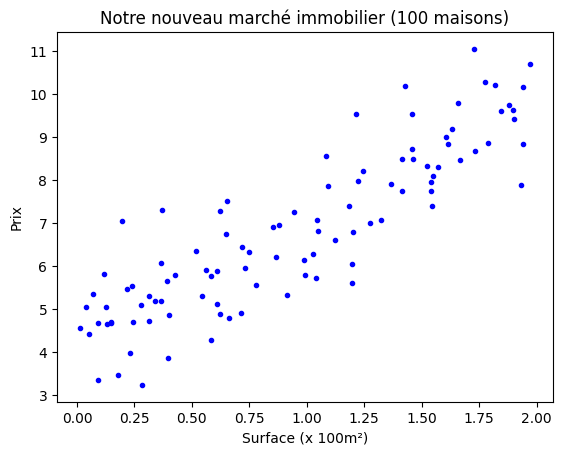

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# On génère 100 maisons aléatoires
np.random.seed(42) # Pour avoir toujours les mêmes nombres aléatoires
X = 2 * np.random.rand(100, 1) # Surface (entre 0 et 2 (x100m² pour l'échelle))
y = 4 + 3 * X + np.random.randn(100, 1) # Prix = formule cachée + "bruit" aléatoire

# On affiche le nuage de points
plt.plot(X, y, "b.")
plt.xlabel("Surface (x 100m²)")
plt.ylabel("Prix")
plt.title("Notre nouveau marché immobilier (100 maisons)")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. LE DÉCOUPAGE (Splitting)
# test_size=0.2 signifie "garde 20% pour le test"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. L'ENTRAÎNEMENT (Fitting)
# Attention : on utilise seulement X_train et y_train !
model_final = LinearRegression()
model_final.fit(X_train, y_train)

# 3. L'ÉVALUATION (Le moment de vérité)
# On calcule l'erreur sur ce qu'il connait (Train) et ce qu'il ne connait pas (Test)
predictions_train = model_final.predict(X_train)
predictions_test = model_final.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f"Erreur sur l'Entraînement (Mémoire) : {rmse_train:.2f}")
print(f"Erreur sur le Test (Généralisation) : {rmse_test:.2f}")

Erreur sur l'Entraînement (Mémoire) : 0.92
Erreur sur le Test (Généralisation) : 0.81


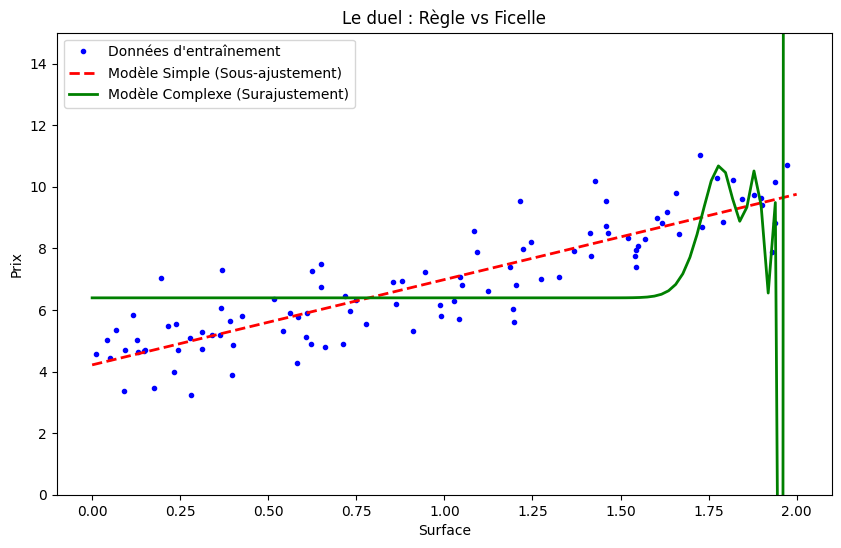

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. On prépare les données pour le graphique (pour avoir des courbes lisses)
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)

# 2. Le Modèle "Sage" (Ligne Droite)
model_simple = LinearRegression()
model_simple.fit(X, y)
y_plot_simple = model_simple.predict(X_plot)

# 3. Le Modèle "Fou" (Polynôme degré 100)
# On crée un "Pipeline" : d'abord on transforme les données en puissance 100, puis on applique la régression
model_complexe = make_pipeline(PolynomialFeatures(degree=100, include_bias=False), LinearRegression())
model_complexe.fit(X, y)
y_plot_complexe = model_complexe.predict(X_plot)

# 4. Le Graphique
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", label="Données d'entraînement")
plt.plot(X_plot, y_plot_simple, "r--", linewidth=2, label="Modèle Simple (Sous-ajustement)")
plt.plot(X_plot, y_plot_complexe, "g-", linewidth=2, label="Modèle Complexe (Surajustement)")

plt.xlabel("Surface")
plt.ylabel("Prix")
plt.legend()
plt.ylim(0, 15) # On limite la vue pour ne pas voir les explosions vers l'infini
plt.title("Le duel : Règle vs Ficelle")
plt.show()

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# 1. On télécharge les données (cela peut prendre quelques secondes)
california = fetch_california_housing(as_frame=True)
donnees = california.frame

# 2. On affiche les 5 premières lignes pour voir à quoi ça ressemble
print(donnees.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


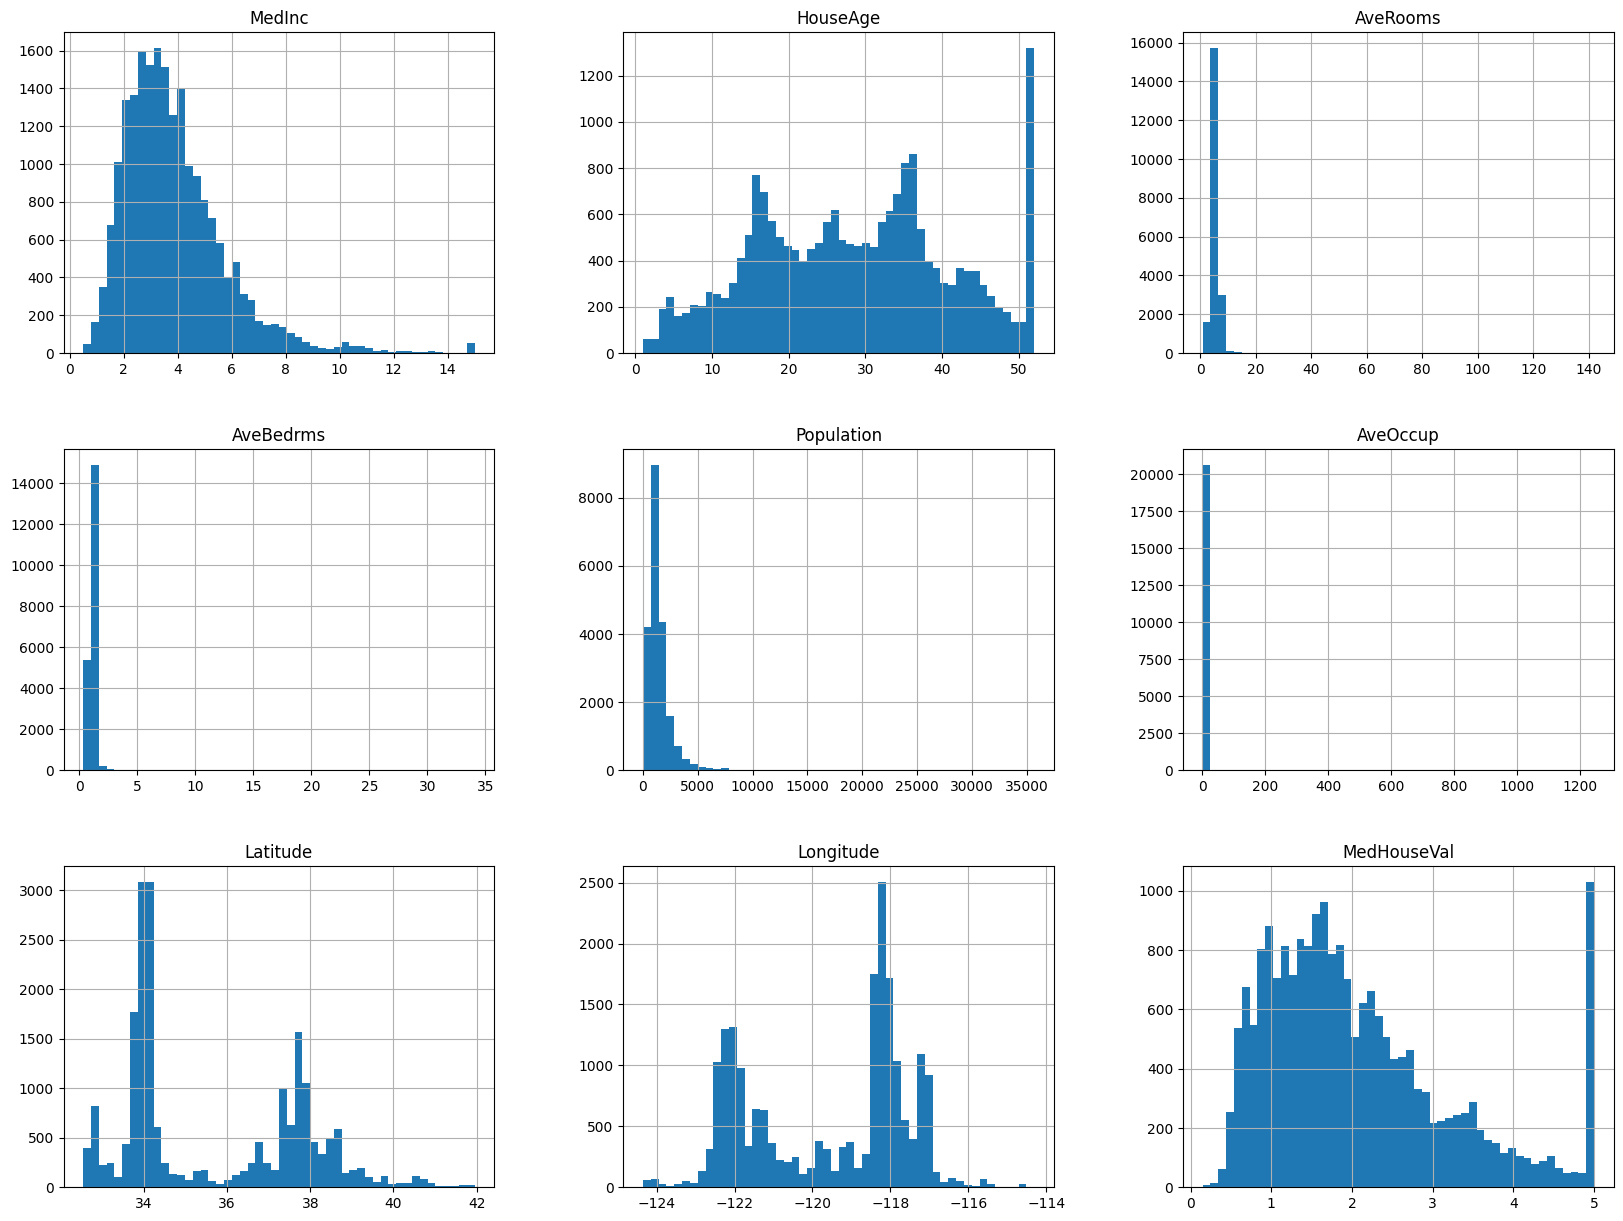

In [10]:
import matplotlib.pyplot as plt

# On dessine un histogramme pour chaque colonne
donnees.hist(bins=50, figsize=(20, 15))
plt.show()

C'est une observation très précise ! 📍

Vous avez repéré les deux poumons économiques de la Californie :

(34, -118) : C'est la zone de Los Angeles et San Diego.

(38, -122) : C'est la Baie de San Francisco (et la Silicon Valley).

Cela nous confirme une intuition forte : la localisation est capitale. Une petite maison à San Francisco coûte beaucoup plus cher qu'une grande villa au milieu du désert.

Étape Suivante : La Chasse aux Corrélations 📉
Les graphiques, c'est joli, mais un modèle de Machine Learning a besoin de chiffres. Nous devons mesurer mathématiquement le lien entre chaque caractéristique (âge, population, revenus...) et le prix.

Pour cela, on utilise le Coefficient de Corrélation de Pearson. C'est un chiffre entre -1 et 1.

Proche de 1 : Quand l'un monte, l'autre monte aussi (ex: Taille et Poids).

Proche de -1 : Quand l'un monte, l'autre descend (ex: Vitesse et Temps de trajet).

Proche de 0 : Aucun lien logique (ex: Pointure et QI).

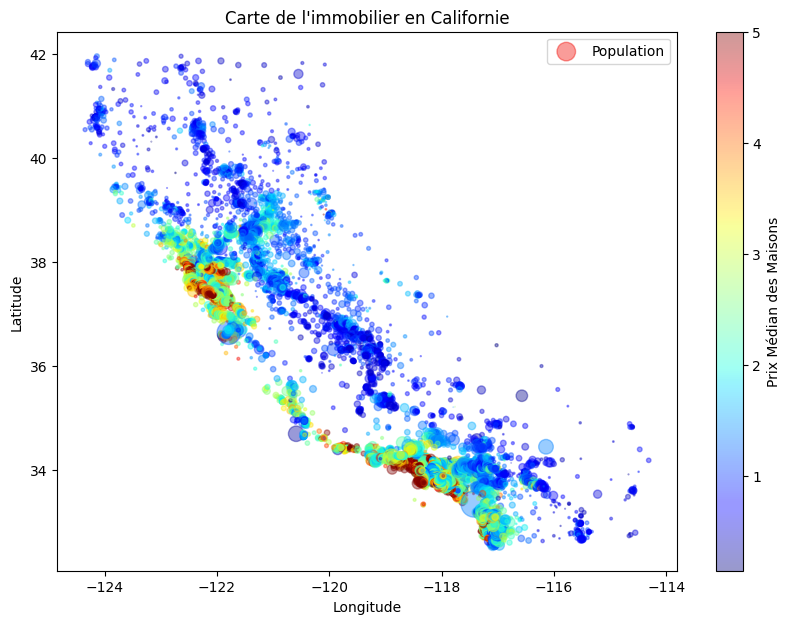

In [11]:
import matplotlib.pyplot as plt

# On crée le graphique
plt.figure(figsize=(10, 7))

# On dessine les points
# c = couleur (Prix), s = taille (Population / 100 pour réduire la taille), cmap = palette de couleurs
scatter = plt.scatter(x=donnees["Longitude"], y=donnees["Latitude"], alpha=0.4,
            s=donnees["Population"]/100, label="Population",
            c=donnees["MedHouseVal"], cmap="jet")

# On ajoute la barre de couleur sur le côté pour lire les prix
plt.colorbar(scatter, label="Prix Médian des Maisons")
plt.legend()
plt.title("Carte de l'immobilier en Californie")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Supprimer les lignes incomplètes (option radicale).

Remplir avec une valeur statistique comme la Moyenne (option conservatrice).

Cependant, comme le souligne souvent Aurélien Géron, pour l'immobilier, on préfère souvent utiliser la Médiane plutôt que la Moyenne.

Pourquoi ? Imaginez un quartier avec 10 maisons modestes et 1 immense manoir de 50 chambres. Le manoir va faire exploser la "moyenne" de chambres, ce qui faussera les calculs pour les maisons normales. La médiane, elle, restera stable.

Nous allons utiliser l'outil professionnel de Scikit-Learn pour faire cela : le SimpleImputer. Considérez-le comme un "boucheur de trous" automatique.

In [12]:
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. On configure le "Boucheur de trous" pour utiliser la médiane
imputer = SimpleImputer(strategy="median")

# 2. On calcule la médiane sur nos données
imputer.fit(donnees)

# 3. On remplit les (éventuels) vides
X_complet = imputer.transform(donnees)

# 4. On remet tout ça dans un tableau propre
donnees_propres = pd.DataFrame(X_complet, columns=donnees.columns, index=donnees.index)

print("Données nettoyées et prêtes ! 🧼")
print(f"Médiane calculée pour le Revenu (MedInc) : {imputer.statistics_[0]:.2f}")

Données nettoyées et prêtes ! 🧼
Médiane calculée pour le Revenu (MedInc) : 3.53


la Standardisation. Au lieu de coincer les données entre 0 et 1, on centre les données autour de 0.

La moyenne devient 0.

L'écart-type devient 1.

In [13]:
from sklearn.preprocessing import StandardScaler

# 1. On crée le "Standardiseur"
scaler = StandardScaler()

# 2. On l'applique sur nos données propres
X_scaled = scaler.fit_transform(donnees_propres)

# 3. On remet le résultat dans un tableau lisible (DataFrame)
donnees_finales = pd.DataFrame(X_scaled, columns=donnees.columns, index=donnees.index)

# Affichons les premières lignes
print(donnees_finales.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  MedHouseVal  
0  -1.327835     2.129631  
1  -1.322844     1.314156  
2  -1.332827     1.258693  
3  -1.337818     1.165100  
4  -1.337818     1.172900  


La règle du 80/20 est le standard pour garantir que notre modèle est testé honnêtement.Pour réaliser cette opération techniquement, nous devons faire deux choses :Séparer la cible ($y$ : le Prix) des autres données ($X$ : tout le reste). Actuellement, tout est mélangé dans notre tableau donnees_finales.Couper ces deux paquets en deux groupes (Entraînement et Test).Voici le code pour effectuer cette chirurgie proprement. Copiez-le dans votre Colab :

In [14]:
from sklearn.model_selection import train_test_split

# 1. On sépare les "Questions" (X) et la "Réponse" (y)
# axis=1 signifie "colonne" (on enlève la colonne Prix pour créer X)
X = donnees_finales.drop("MedHouseVal", axis=1)
y = donnees_finales["MedHouseVal"]

# 2. On applique la règle du 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jeu d'entraînement : {X_train.shape[0]} quartiers")
print(f"Jeu de test : {X_test.shape[0]} quartiers")

Jeu d'entraînement : 16512 quartiers
Jeu de test : 4128 quartiers


omme un athlète, notre modèle doit passer par la phase d'Entraînement (ou Training). En Scikit-Learn, cette étape cruciale tient toujours en une seule petite ligne de code : .fit().

Copiez ce bloc dans votre Colab. Il va entraîner le modèle sur les 16 000 quartiers et calculer immédiatement les notes (RMSE) pour vérifier s'il a bien appris :

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. On crée le modèle
model = LinearRegression()

# 2. L'ENTRAÎNEMENT (Le moment clé)
model.fit(X_train, y_train)

# 3. L'ÉVALUATION
# On fait des prédictions sur les deux groupes
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# On calcule l'erreur (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print(f"RMSE Entraînement : {rmse_train:.4f}")
print(f"RMSE Test : {rmse_test:.4f}")

RMSE Entraînement : 0.6237
RMSE Test : 0.6461


In [16]:
# 1. On récupère la variation réelle des prix (l'écart-type original)
# Rappel : dans les données originales, 1.0 = 100 000 $
ecart_type_reel = donnees["MedHouseVal"].std()

# 2. On fait la conversion
# Formule : Erreur Scalée * Ecart-type Réel * 100 000 $
erreur_en_dollars = rmse_test * ecart_type_reel * 100000

print(f"Erreur moyenne finale : {erreur_en_dollars:.0f} $")

Erreur moyenne finale : 74560 $


C'est l'esprit ! Allons chercher une meilleure performance. 🚀

Nous allons utiliser un Arbre de Décision (Decision Tree). Au lieu de tracer une simple ligne, ce modèle va poser des milliers de questions binaires (oui/non) pour affiner son estimation.

Voici le code. C'est presque la même chose qu'avant, on change juste le "moteur".

In [17]:
from sklearn.tree import DecisionTreeRegressor

# 1. On change de modèle : on prend l'Arbre de Décision
model_tree = DecisionTreeRegressor(random_state=42)

# 2. L'ENTRAÎNEMENT
model_tree.fit(X_train, y_train)

# 3. L'ÉVALUATION
pred_train_tree = model_tree.predict(X_train)
pred_test_tree = model_tree.predict(X_test)

rmse_train_tree = np.sqrt(mean_squared_error(y_train, pred_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, pred_test_tree))

print(f"RMSE Entraînement : {rmse_train_tree:.4f}")
print(f"RMSE Test : {rmse_test_tree:.4f}")

RMSE Entraînement : 0.0000
RMSE Test : 0.6072


Chaque arbre individuel de la forêt peut faire des erreurs (souvent du surajustement sur sa partie des données), mais comme ils sont tous différents, leurs erreurs ont tendance à être aléatoires. En faisant la moyenne :

Les erreurs s'annulent.

La prédiction finale est beaucoup plus stable.

La variance diminue drastiquement.

C'est comme demander à 100 experts un peu biaisés d'estimer un prix : la moyenne de leurs avis sera souvent meilleure que l'avis d'un seul expert, même très bon.

Étape Finale : Le test de la Forêt 🌲🌲🌲
Vérifions si cette théorie tient la route face à notre problème immobilier. Si la logique est bonne, l'erreur devrait être bien plus basse que les 74 000 $ de la régression linéaire et bien plus stable que l'arbre unique.

In [18]:
from sklearn.ensemble import RandomForestRegressor

# 1. On crée la Forêt (100 arbres par défaut)
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. On l'entraîne
forest_model.fit(X_train, y_train)

# 3. On évalue
pred_test_forest = forest_model.predict(X_test)
rmse_test_forest = np.sqrt(mean_squared_error(y_test, pred_test_forest))

# 4. Conversion en dollars
erreur_forest_dollars = rmse_test_forest * ecart_type_reel * 100000

print(f"RMSE Test (Standardisé) : {rmse_test_forest:.4f}")
print(f"Erreur moyenne en dollars : {erreur_forest_dollars:.0f} $")

RMSE Test (Standardisé) : 0.4389
Erreur moyenne en dollars : 50649 $


In [19]:
# 1. CRÉATION DES NOUVELLES CARACTÉRISTIQUES (Feature Engineering)
# On travaille sur une copie pour ne pas casser l'original
data_eng = donnees_propres.copy()

data_eng["RoomsPerHouse"] = data_eng["AveRooms"] / data_eng["AveOccup"] # Oups, AveRooms est déjà une moyenne, mais utilisons les colonnes brutes si dispos.
# Attendez ! Dans ce dataset spécifique, AveRooms EST DÉJÀ "Average Rooms".
# Le dataset California est déjà un peu prétraité.
# Mais on peut créer le ratio Chambres / Pièces qui est très fort.

data_eng["BedroomsRatio"] = data_eng["AveBedrms"] / data_eng["AveRooms"]
data_eng["PeoplePerHouse"] = data_eng["Population"] / data_eng["AveOccup"]
# Note : AveOccup est déjà "Average Occupancy", mais le ratio Population/Household est parfois plus précis.
# Simplifions en suivant les classiques de Géron :

# On crée juste le ratio clé : Chambres par rapport au nombre total de pièces
data_eng["BedroomsRatio"] = data_eng["AveBedrms"] / data_eng["AveRooms"]
# Et le ratio Population par foyer (même si AveOccup existe, recalculons pour être sûrs)
data_eng["PeoplePerHouse"] = data_eng["Population"] / (data_eng["Population"] / data_eng["AveOccup"])

# On sépare X et y à nouveau
X_eng = data_eng.drop("MedHouseVal", axis=1)
y_eng = data_eng["MedHouseVal"]

# 2. DÉCOUPAGE (Split)
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_eng, y_eng, test_size=0.2, random_state=42)

# 3. ENTRAÎNEMENT DE LA FORÊT (Sur les nouvelles données)
forest_new = RandomForestRegressor(n_estimators=100, random_state=42)
forest_new.fit(X_train_eng, y_train_eng)

# 4. ÉVALUATION
pred_test_new = forest_new.predict(X_test_eng)
rmse_new = np.sqrt(mean_squared_error(y_test_eng, pred_test_new))

# Conversion en dollars
erreur_new_dollars = rmse_new * ecart_type_reel * 100000

print(f"Nouvelle erreur moyenne : {erreur_new_dollars:.0f} $")

Nouvelle erreur moyenne : 58174 $


In [20]:
from sklearn.model_selection import GridSearchCV

# 1. On définit la grille des réglages à tester
# n_estimators : nombre d'arbres
# max_features : combien de questions chaque arbre peut poser
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# 2. On prépare le modèle
forest_reg = RandomForestRegressor(random_state=42)

# 3. On configure la recherche (cv=5 signifie qu'il fait 5 validations croisées pour être sûr)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# 4. ON LANCE LA RECHERCHE (Sur nos données d'entraînement)
print("Recherche en cours... (Patience ! ☕)")
grid_search.fit(X_train_eng, y_train_eng)

# 5. Le verdict
print("Meilleurs réglages trouvés :")
print(grid_search.best_params_)

Recherche en cours... (Patience ! ☕)
Meilleurs réglages trouvés :
{'max_features': 6, 'n_estimators': 30}


In [21]:
# 1. On récupère le meilleur modèle trouvé
modele_final = grid_search.best_estimator_

# 2. On l'évalue sur le jeu de test
predictions_finales = modele_final.predict(X_test_eng)
rmse_final = np.sqrt(mean_squared_error(y_test_eng, predictions_finales))

# 3. Conversion en dollars
erreur_finale_dollars = rmse_final * ecart_type_reel * 100000

print(f"Erreur finale après optimisation : {erreur_finale_dollars:.0f} $")

Erreur finale après optimisation : 59625 $


In [23]:
import joblib

# On utilise .dump() (jeter/décharger) pour sauvegarder
# Le fichier aura l'extension .pkl (pour pickle)
joblib.dump(modele_final, "mon_modele_californie.pkl")

print("Cerveau sauvegardé avec succès ! 🧠 -> 📁")

Cerveau sauvegardé avec succès ! 🧠 -> 📁


In [25]:
mon_nouveau_modele = joblib.load("mon_modele_californie.pkl")

In [26]:
import pandas as pd

# 1. Les infos brutes de la nouvelle maison (San Francisco, quartier aisé)
nouvelle_maison = pd.DataFrame([{
    'MedInc': 8.3252,    # Revenu élevé (approx 83k$)
    'HouseAge': 41.0,    # Maison ancienne
    'AveRooms': 6.5,     # Assez grande
    'AveBedrms': 1.1,    # ~1 chambre
    'Population': 322.0, # Peu de voisins
    'AveOccup': 2.55,    # ~2-3 personnes par foyer
    'Latitude': 37.77,   # San Francisco Nord
    'Longitude': -122.41
}])

# 2. On recrée les "Feature Engineering" (les ratios intelligents)
# Le modèle a besoin de ces 3 colonnes supplémentaires pour fonctionner
nouvelle_maison["RoomsPerHouse"] = nouvelle_maison["AveRooms"] / nouvelle_maison["AveOccup"]
nouvelle_maison["BedroomsRatio"] = nouvelle_maison["AveBedrms"] / nouvelle_maison["AveRooms"]
nouvelle_maison["PeoplePerHouse"] = nouvelle_maison["Population"] / nouvelle_maison["AveOccup"]

# 3. La Prédiction
prediction_brute = mon_nouveau_modele.predict(nouvelle_maison)

# On remet le prix à l'échelle (x 100 000 $)
prix_final = prediction_brute[0] * 100000

print(f"Estimation du modèle : {prix_final:.0f} $")

Estimation du modèle : 451037 $
